# A demo Model

After initializing a model, its state is `init`

In [1]:
from abses import MainModel

model = MainModel(name='demo', base='tests')
model

<MainModel-v0.1.0(demo): init>

## Initialization

For intuition, the model has a default start date and spatial extent. Those contexts can be modified by the user via the parameter profile, see the [parameter settings tutorial](parameters.ipynb) for details.

2000

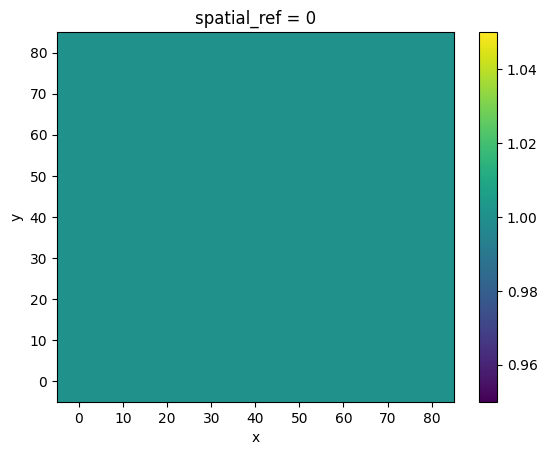

In [2]:
# default time series
model.time

# default natural space
model.nature.accessible.plot()

## Human module

Now you can try to create your own sub-modules under the [model, nature, human structure of ABSESpy](../user_guide.md#structures).

In [3]:
from abses import HumanModule


# define my human sub-module
class MyModule(HumanModule):

    def say_hello(self):
        self.define('actors', "MyActor")
        for actor in self.actors:
            print(f"{actor} is saying hello to you!")


module = model.human.create_module(MyModule)
module.creator

<human: open>

Now, add some `actors` to the model. For more information on how to select and operate Actors, please refer to the [human section of the tutorial](human/actors.ipynb).

In [4]:
from abses import Actor

# define my 'Actors' (agent)
class MyActor(Actor):
    pass

# creating 3 actors
actors = model.agents.create(MyActor, 3)

# They are accessible by your customized module's methods, too.
module.say_hello()

MyActor (Obj 8) is saying hello to you!
MyActor (Obj 7) is saying hello to you!
MyActor (Obj 6) is saying hello to you!


## Nature Module

As of now, the actors created above have not been added to the world. Add them using the Nature module method, where you can choose to randomise them or specify a location.

In [5]:
# now, there is no actor in the world
model.nature.has_agent()

Patch([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

The `has_agent()` method that counts how many eligible actors are in each cell returns the data type `Patch`, which is an inherited data type from `numpy.ndarray` and whose properties can be seen in this guide. It will be visualised below using the `Patch.xda.plot()` interface.

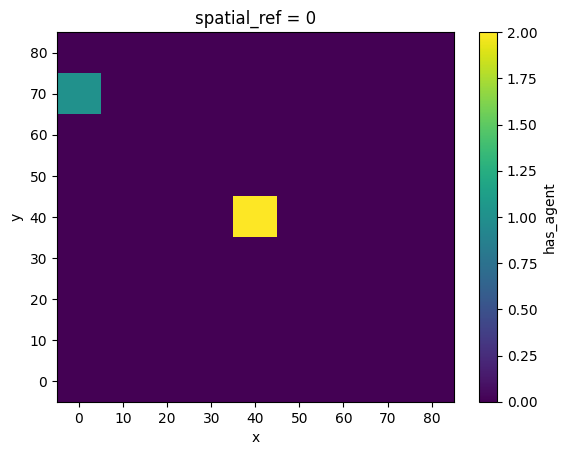

In [6]:
import numpy as np
np.random.seed(1)  # seed random number generator

assigned_actors = actors[:2]
random_actors = actors[2:]

model.nature.add_agents(assigned_actors, [(4, 4), (4, 4)])
model.nature.add_agents(random_actors)

actors_num = model.nature.has_agent()
actors_num.xda.plot()  # number of actors in each cell.

Now, create your own space sub-module, users will find that this module shares the geographic coordinate system with the `Nature` module.
 <!-- which will simply store how many subjects are on it. -->

In [7]:
from abses import PatchModule

home = model.nature.create_module(PatchModule, name='home')

home  # <home: open>
home.geo is model.nature.geo  # True
home.geo.shape  # (9, 9)

<home: open>

True

(9, 9)

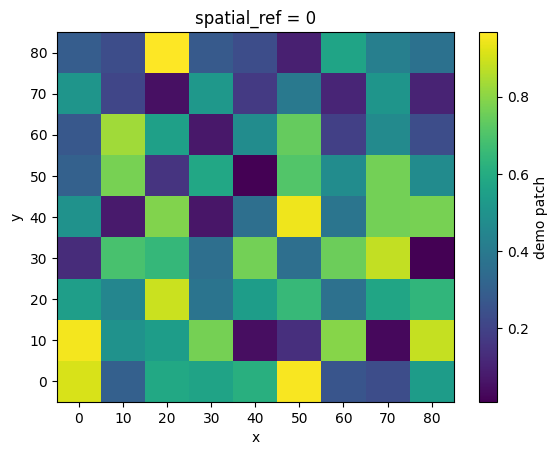

In [8]:
# random 
array = np.random.random(size=(9, 9))
patch = home.create_patch(array, name='demo patch', add=True)

patch.xda.plot()

Actors can access values of any `Patch` by their position.

In [9]:
actors.loc('demo patch')

[0.3553103624164283, 0.3553103624164283, 0.508247537567289]

## Experiment

This document shows just the simplest model structure of the ABSESpy framework and the research paradigm it creates. First you build the `MainModel`, then you have the `human` module that manipulates the body and the `nature` module that manipulates the spatial data. You can customise more `sub-modules` under each of the two part, and they will have similar operational logic.